In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm
import glob

In [2]:
f_diss = 0.1
X = 0.74 
F0 = 2.1e7
G0 = 2. * f_diss * F0 * mp/X
r0 = 250. * pc
v0 = 170. * kmps
t0 = r0/v0
Mach = 1.e3
Sigma0        = 52.*Msun_pcsq
rmax = 10. * kpc
tdyn = rmax/v0
sat_time = (Sigma0/G0)/Myr
xi_sol = np.log(G0*t0/Sigma0)
xi_sol, G0

(-3.3011022787786, 9.478378378378378e-18)

In [43]:
Gamma = np.logspace(-5, 2., 100)
xi_arr = np.linspace(-11, 7., 100) #xi = np.log(t0*G0/Sigma0)

a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        xi1 = 10.**xi
        dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi1, Mach, 0))[0]

        dMassFluxtot[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma,  Mach, 0))[0] 

        
    
        j+=1
            
    i+=1


/Users/aditivijayan/Projects/PhotoIonization/lib/functions.py:27: RuntimeWarning: invalid value encountered in sqrt
  Ua_x =  np.sqrt((gamma*np.exp(-x) -1.)) * np.sqrt((a-1.)/a) #fixed area
/Users/aditivijayan/Projects/PhotoIonization/lib/functions.py:40: RuntimeWarning: invalid value encountered in sqrt
  prefac = 2. * xi * np.exp(-x)/np.sqrt(gamma*np.exp(-x)-1.)
/var/folders/bh/gk6r7v913g3dxj455c079xyh0000gq/T/ipykernel_2882/111273773.py:19: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \


In [40]:
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_flux = 1. - dMassFlux
FH2_flux[FH2_flux<0.0] = 0.0
np.amax(FH2_flux),np.amin(FH2_flux)

(nan, nan)

# Daddi+10 Data

In [450]:
data_home = os.path.join(home, "Data/CleanData/")
datapath = os.path.join(data_home, "*.txt")
list_file = glob.glob(datapath)
log_siggas = []
log_sigSFR = []
log_siggas_tdyn = []
galtype = []
radius = []
torb = []
list_file = ['/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt']
for file in list_file:
    infile = open(file)
    lines = infile.readlines()
#     print(file)
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            gal_type = str(line.split()[3])
            rad = float(line.split()[4])
            torbval = float(line.split()[5])
            if(file == '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt'):
                siggas = np.log10(siggas)
                sigSFR = np.log10(sigSFR)
                sgastdyn = np.log10(sgastdyn)
            torb.append(torbval)
            log_siggas.append(siggas)
            log_sigSFR.append(sigSFR)
            log_siggas_tdyn.append(sgastdyn)
            galtype.append(gal_type)
            radius.append(rad)

            break
            
log_siggas_daddi =(log_siggas)
log_sigSFR_daddi = log_sigSFR
log_torb_daddi   = (log_torb)
log_siggas_tdyn_daddi  = log_siggas_tdyn
galtype_daddi    = galtype
siggas_daddi     = 10.**(np.asarray(log_siggas))*Msun/pc/pc
torb_daddi       = np.asarray(torb) * Myr
rad_daddi        = np.asarray(radius)*kpc
v0_daddi         =  2. *math.pi * rad_daddi/torb_daddi/kmps
v0_daddi[1], rad_daddi[1]/kpc, torb_daddi[1]/Myr

(219.54892659910658, 6.2, 170.0)

# Genzel Data

In [460]:
data_home = os.path.join(home, "Data/CleanData/")
datapath = os.path.join(data_home, "*.txt")
list_file = glob.glob(datapath)
log_siggas = []
log_sigSFR = []
log_siggas_tdyn = []
galtype = []
radius = []
log_torb = []
v0_genzel = []
list_file = ['/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/genzel2010.txt']
for file in list_file:
    infile = open(file)
    lines = infile.readlines()
#     print(file)
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            gal_type = str(line.split()[3])
            rad = float(line.split()[4])
            torb = float(line.split()[5])
            v0 = float(line.split()[6])
            log_torb.append(torb)
            log_siggas.append(siggas)
            log_sigSFR.append(sigSFR)
            log_siggas_tdyn.append(sgastdyn)
            galtype.append(gal_type)
            radius.append(rad)
            v0_genzel.append(v0)
            break
            
log_siggas_genzel =(log_siggas)
log_sigSFR_genzel = log_sigSFR
log_torb_genzel = (log_torb)
log_siggas_tdyn_genzel = log_siggas_tdyn
siggas_genzel = 10.**(np.asarray(log_siggas))*Msun/pc/pc
torb_genzel = 10.**np.asarray(log_torb) * Myr
galtype_genzel = (galtype)
rad_genzel = np.asarray(radius)*kpc
# v0_genzel = 2.  * math.pi * rad_genzel/torb_genzel/kmps
v0_genzel

[157.0, 590.0, 295.0, 457.0, 442.0, 343.0, 317.0, 430.0, 346.0, 523.0, 590.0]

# Kennicutt Data

In [324]:
data_home = os.path.join(home, "Data/CleanData/")
datapath = os.path.join(data_home, "*.txt")
list_file = glob.glob(datapath)
log_siggas = []
log_siggas_tdyn = []
galtype = []
rad_arcmin = []
distance = []
log_torb = []
log_sigSFR = []
list_file = ['/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/kennicutt98b.txt']
for file in list_file:
    infile = open(file)
    lines = infile.readlines()
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            gal_type = str(line.split()[3])
            if(len(line.split())>7):
                log_siggas.append(siggas)
                log_sigSFR.append(sigSFR)
                log_siggas_tdyn.append(sgastdyn)
                log_torb.append(float(line.split()[-1]))
                distance.append(float(line.split()[-2]))
                rad_arcmin.append(float(line.split()[-3])/2.)
                galtype.append(gal_type)
            break
            
log_siggas_kenni =(log_siggas)
log_sigSFR_kenni = log_sigSFR
log_torb_kenni = (log_torb)
log_siggas_tdyn_kenni = log_siggas_tdyn
galtype_kenni = (galtype)
siggas_kenni = 10.**(np.asarray(log_siggas))*Msun/pc/pc
torb_kenni = 10.**(np.asarray(log_torb)) * Myr
distance = np.asarray(distance)
rad_radian = np.asarray(rad_arcmin)*2.9e-4
rad_kenni= rad_radian * distance * 1.e3 * kpc
v0_kenni = 2. * math.pi * rad_kenni/torb_kenni/kmps
# v0_kenni,np.log10(torb_kenni[-3]/Myr), 
rad_kenni[4]/kpc,v0_kenni[4], (torb_kenni[4]/Myr), 

(11.831999999999999, 1.4980470588661592, 158.48931924611142)

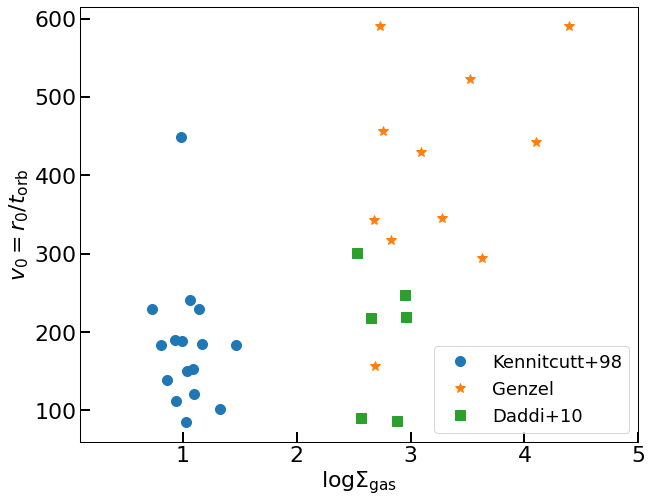

In [457]:
plt.figure(figsize=(10,8))
plt.plot(log_siggas_kenni, v0_kenni, 'o', label='Kennitcutt+98', markersize=10)
plt.plot(log_siggas_genzel, v0_genzel, '*', label = 'Genzel', markersize=10)
plt.plot(log_siggas_daddi, v0_daddi, 's', label='Daddi+10', markersize=10)
plt.ylabel(r"$v_0=r_0/t_{\rm orb}$")
plt.xlabel(r'log$\Sigma_{\rm gas}$')
plt.xlim(0.1, 5.)
plt.legend(fontsize=18,  loc='lower right')

In [328]:
logsiggas = log_siggas_daddi + log_siggas_genzel + log_siggas_kenni
logsfr    = log_sigSFR_daddi + log_sigSFR_genzel + log_sigSFR_kenni
logtorb   = log_torb_daddi   + log_torb_genzel   + log_torb_kenni
galtype   = np.asarray(galtype_daddi    + galtype_genzel    + galtype_kenni)
radius    = np.asarray(rad_daddi.tolist() + rad_genzel.tolist() + rad_kenni.tolist())
logsiggas_tdyn = log_siggas_tdyn_daddi + log_siggas_tdyn_genzel + log_siggas_tdyn_kenni

siggas    = 10.**np.asarray(logsiggas)*Msun/pc/pc
sigSFR    = 10.**np.asarray(logsfr) * Msun/yr_to_sec/kpc/kpc
siggas_tdyn = 10.**np.asarray(logsiggas_tdyn)*Msun/yr_to_sec/pc/pc/1.e6
torb      = 10.**np.asarray(logtorb)*Myr
p_avg     = 3.e3 * 1.e5
G         = 6.67e-8
gamma_data_new = sigSFR * p_avg * torb**2/(16. * math.pi**3 * radius * siggas)
gamma_data_old = 2. * fg * sigSFR * p_avg/(math.pi * G * (siggas**2.))
G0 = 1. * 9.478378378378378e-18 
xi_data = np.log(G0/siggas_tdyn)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


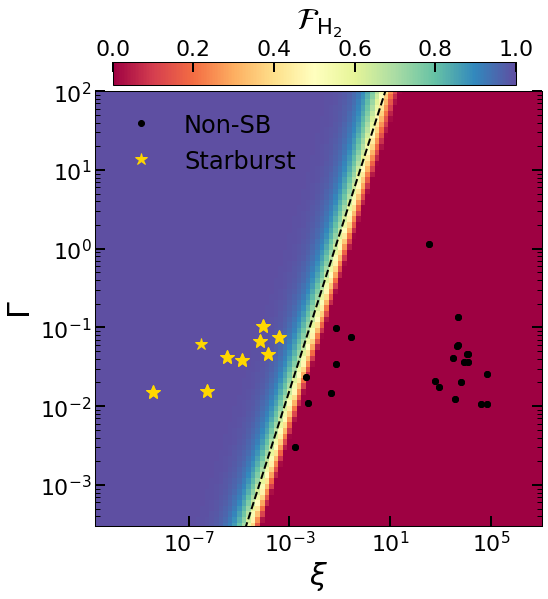

In [329]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax.pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
# ax.set_xlim(-11., 7.)
ax.set_ylim(3.e-4, 1.e2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\Gamma$', fontsize=30)
ax.set_xlabel(r'$\xi$', fontsize=30)
ax.tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



slope = 1.
yy =  ( xi_arr * slope + 1.2) 
ax.plot(10.**xi_arr, 10.**yy, color='black', ls='--', lw=2.)
ax.legend(loc='lower right', fontsize="30")
ax.set_xlim(2.e-11, 1.e7)


for i in range(xi_data.shape[0]):
    
    if(galtype[i]=='Starburst'):
        if(i==8):
            ax.plot(10.**xi_data[i], gamma_data_new[i], '*', color='gold', markersize='12',label='Starburst')
        else:
            ax.plot(10.**xi_data[i], gamma_data_new[i], '*', color='gold', markersize='14')
            ax.plot(10.**xi_data[i], gamma_data_new[i], '*', color='gold', markersize='14')
    else:
        if(i==0):
            ax.plot(10.**xi_data[i], gamma_data_new[i], 'o', color='black', markersize='6')
            ax.plot(10.**xi_data[i], gamma_data_new[i], 'o', color='black', markersize='6', label='Non-SB')
        else:
            ax.plot(10.**xi_data[i], gamma_data_new[i], 'o', color='black', markersize='6')
            ax.plot(10.**xi_data[i], gamma_data_new[i], 'o', color='black', markersize='6')

ax.legend(loc='upper left', fontsize="24", frameon=False)
ax.legend(loc='upper left', fontsize="24", frameon=False)
# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'gamma_xi_gals.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )


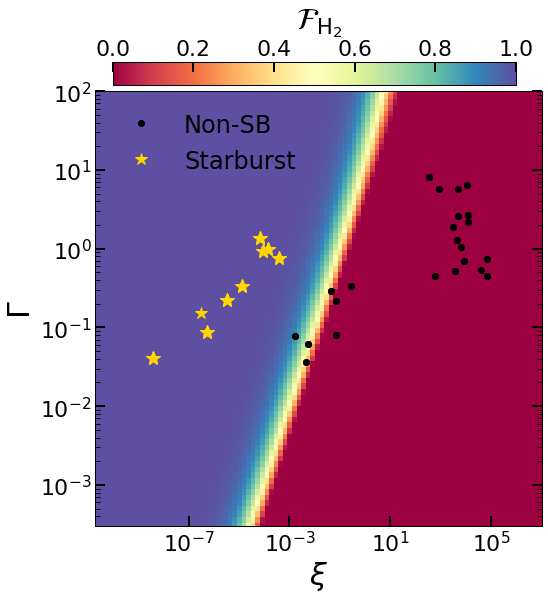

In [330]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax.pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
# ax.set_xlim(-11., 7.)
ax.set_ylim(3.e-4, 1.e2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\Gamma$', fontsize=30)
ax.set_xlabel(r'$\xi$', fontsize=30)
ax.tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



slope = 1.
yy =  ( xi_arr * slope + 1.2) 
# ax.plot(10.**xi_arr, 10.**yy, color='black', ls='--', lw=2.)
# ax.legend(loc='lower right', fontsize="30")
ax.set_xlim(2.e-11, 1.e7)


for i in range(xi_data.shape[0]):
    
    if(galtype[i]=='Starburst'):
        if(i==8):
            ax.plot(10.**xi_data[i], gamma_data_old[i], '*', color='gold', markersize='12',label='Starburst')
        else:
            ax.plot(10.**xi_data[i], gamma_data_old[i], '*', color='gold', markersize='14')
            ax.plot(10.**xi_data[i], gamma_data_old[i], '*', color='gold', markersize='14')
    else:
        if(i==0):
            ax.plot(10.**xi_data[i], gamma_data_old[i], 'o', color='black', markersize='6')
            ax.plot(10.**xi_data[i], gamma_data_old[i], 'o', color='black', markersize='6', label='Non-SB')
        else:
            ax.plot(10.**xi_data[i], gamma_data_old[i], 'o', color='black', markersize='6')
            ax.plot(10.**xi_data[i], gamma_data_old[i], 'o', color='black', markersize='6')

ax.legend(loc='upper left', fontsize="24", frameon=False)
ax.legend(loc='upper left', fontsize="24", frameon=False)
# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'gamma_xi_gals.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )


In [ ]:
data_home = os.path.join(home, "Data/")
datapath = os.path.join(data_home, "*.txt")
list_file = glob.glob(datapath)
log_siggas = []
log_sigSFR = []
log_siggas_tdyn = []
galtype = []
radius = []
log_torb = []
list_file = ['/Users/aditivijayan/Projects/PhotoIonization/Data/krumholz_12.txt']
for file in list_file:
    infile = open(file)
    lines = infile.readlines()
#     print(file)
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            gal_type = str(line.split()[3])
            rad = float(line.split()[4])
            torb = float(line.split()[5])
            
            log_torb.append(torb)
            log_siggas.append(siggas)
            log_sigSFR.append(sigSFR)
            log_siggas_tdyn.append(sgastdyn)
            galtype.append(gal_type)
            radius.append(rad)
            print(rad)
            break
            
log_siggas_genzel =(log_siggas)
log_sigSFR_genzel = log_sigSFR
log_torb_genzel = (log_torb)
log_siggas_tdyn_genzel = log_siggas_tdyn
siggas_genzel = 10.**(np.asarray(log_siggas))*Msun/pc/pc
torb_genzel = 10.**np.asarray(log_torb) * Myr
galtype_genzel = (galtype)
rad_genzel = np.asarray(radius)*kpc
v0_genzel = 2.  * math.pi * rad_genzel/torb_genzel/kmps
v0_genzelt

In [715]:
file = '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/krumholz12.txt'
log_torb = []
gal_name_krum = []
gal_type_krum = []
log_sigmagas = []
log_sigmastar = []
log_siggastdyn = []
infile = open(file)
lines = infile.readlines()
i=0
for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            name = (line.split('\t')[0].split(' ')[1])
            if ((name.find('+')*name.find('w'))>0):
                gal_name_krum.append(int(name))
                gal_type_krum.append(line.split('\t')[1])
                log_sigmagas.append(float(line.split('\t')[2]))
                log_torb.append(float(line.split('\t')[3]))
                log_siggastdyn.append(float(line.split('\t')[4]))
                log_sigmastar.append(float(line.split('\t')[5]))
            break

gal_name_krum = np.asarray(gal_name_krum)
log_sigmagas_krum = np.asarray(log_sigmagas)
log_sigmastar_krum = np.asarray(log_sigmastar)
torb_krum = 10.**np.asarray(log_torb)
log_siggastdyn_krum = np.asarray(log_siggastdyn)
# gal_type_krum = np.asarray(gal_type_krum)

In [718]:
file = '/Users/aditivijayan/Projects/PhotoIonization/Data/kennicutt98_table1.txt'
dia_arcmin = []
gal_name_kenni = []

infile = open(file)
lines = infile.readlines()
for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            gal_name_kenni.append(int(line.split()[0]))
            dia = float(line.split()[1])
            dia_arcmin.append(dia)
            break
gal_name_kenni = np.asarray(gal_name_kenni)
dia_arcmin = np.asarray(dia_arcmin)

In [719]:
common_krkc = (np.intersect1d(gal_name_krum, gal_name_kenni))
indices_krum = np.where(np.isin(gal_name_krum, common_krkc))[0]
indices_kenni = np.where(np.isin(gal_name_kenni, common_krkc))[0]
common_krkc

array([ 224,  598,  772,  925, 1569, 2336, 2403, 2903, 2976, 3031, 3310,
       3338, 3368, 3486, 3521, 3631, 3675, 3726, 3893, 4178, 4254, 4258,
       4294, 4303, 4321, 4394, 4402, 4501, 4519, 4535, 4548, 4561, 4569,
       4571, 4579, 4639, 4647, 4651, 4654, 4689, 4698, 4713, 4736, 5033,
       5055, 5457, 6207, 6217, 6503, 6643, 7331])

In [720]:
sorted_name_krum = [x for _,x in sorted(zip(gal_name_kenni[indices_kenni],gal_name_krum[indices_krum]))]
print(len(sorted_name_krum))

51


In [721]:
sorted_gtype_krum = []
for ele in sorted_name_krum:
    indx = np.where(ele==gal_name_krum)[0]
    sorted_gtype_krum.append(gal_type_krum[int(indx)])

In [722]:
inds = np.asarray(sorted_name_krum).argsort()
trunc_logSigGas_krum = log_sigmagas_krum[indices_krum]
sorted_logSigGas_krum =trunc_logSigGas_krum[inds]
trunc_logSigStar_krum = log_sigmastar_krum[indices_krum]
sorted_logSigStar_krum =trunc_logSigStar_krum[inds]
trunc_torb_krum = torb_krum[indices_krum]
sorted_torb_krum =trunc_torb_krum[inds]
trunc_siggastdyn_krum = log_siggastdyn_krum[indices_krum]
sorted_siggastdyn_krum =trunc_siggastdyn_krum[inds]

In [655]:
file = '/Users/aditivijayan/Projects/PhotoIonization/Data/common_galaxies.txt'
common_name = (np.loadtxt(file, usecols=0))
distance_kenni = np.loadtxt(file, usecols=1)
common_name.shape, distance_kenni.shape


((51,), (51,))

In [656]:
(dia_arcmin[indices_kenni])

array([165.2,  55.9,   7.2,   8.9,   2.5,   6.9,  15.8,  10.7,   4.9,
        22.2,   3.5,   5.9,   6.5,   7.1,   8.1,   4.6,   5.9,   5.4,
         3.9,   4. ,   5.2,  15.1,   2.5,   5.9,   6.8,   3.9,   3.1,
         6. ,   3.1,   6.3,   5.1,   1.4,   7.9,   3.7,   5.1,   2.7,
         3.4,   3.5,   4.3,   3.9,   3.7,   2.6,  10.5,   9.1,  11. ,
        26.9,   2.6,   3. ,   4.9,   3.4,   8.5])

In [657]:
radius_kenni = (dia_arcmin[indices_kenni]*2.9e-4/2.) * distance_kenni * 1.e3 * kpc
radius_kenni/kpc

array([16.7678 ,  6.4844 , 34.452  , 12.25975,  1.0875 , 33.0165 ,
       27.492  , 13.9635 ,  2.48675, 11.5884 ,  9.135  , 20.532  ,
        9.425  ,  0.     , 15.2685 , 14.674  , 15.399  , 10.962  ,
        9.6135 ,  8.004  , 13.195  , 15.3265 ,  0.     , 14.97125,
       17.255  ,  9.89625,  7.192  , 13.05   ,  7.6415 , 15.98625,
       12.94125,  4.669  , 20.04625,  9.38875, 12.94125,  6.85125,
        8.6275 ,  0.     , 10.91125,  9.89625,  9.38875,  9.048  ,
        6.85125, 11.8755 ,  0.     , 23.403  ,  6.032  ,  0.     ,
        4.263  ,  9.86   , 17.255  ])

In [733]:
file = '/Users/aditivijayan/Projects/PhotoIonization/Data/krumholz_kennit_gal_data.txt'
np.savetxt(file, np.column_stack([common_name,      dia_arcmin[indices_kenni],        distance_kenni,\
                                  radius_kenni/kpc, sorted_logSigGas_krum, sorted_logSigStar_krum,\
                                  sorted_torb_krum, sorted_siggastdyn_krum]),\
           fmt='%i \t %1.2f \t %1.2f \t %1.2f \t %1.2f \t %1.2f \t %1.2f \t %1.2f \n')

In [725]:
sorted_logSigGas_krum

array([0.68, 1.03, 0.94, 0.91, 1.33, 0.91, 0.88, 0.86, 0.98, 0.85, 1.14,
       0.81, 0.93, 0.88, 1.22, 1.16, 0.99, 1.06, 1.06, 1.13, 1.39, 0.59,
       1.02, 1.21, 1.14, 0.63, 1.08, 1.09, 0.99, 1.01, 0.69, 1.52, 0.61,
       0.83, 0.81, 0.73, 1.04, 1.06, 1.1 , 0.94, 0.25, 1.04, 0.65, 0.93,
       1.17, 1.09, 1.03, 1.29, 0.89, 1.11, 1.08])

In [726]:
sorted_logSigStar_krum

array([-3.37, -2.71, -3.08, -2.68, -1.04, -2.16, -2.39, -2.55, -1.9 ,
       -2.74, -1.38, -2.8 , -2.79, -2.7 , -2.15, -1.97, -2.25, -2.52,
       -2.2 , -2.51, -1.94, -2.6 , -2.11, -1.98, -2.31, -3.12, -3.04,
       -2.45, -2.22, -2.62, -2.76, -2.17, -3.02, -2.8 , -2.56, -2.35,
       -2.46, -2.22, -2.3 , -2.62, -3.79, -1.77, -2.46, -2.88, -2.56,
       -2.7 , -1.94, -2.15, -2.32, -2.05, -2.57])

In [731]:
sorted_logSigStar_krum

array([-3.37, -2.71, -3.08, -2.68, -1.04, -2.16, -2.39, -2.55, -1.9 ,
       -2.74, -1.38, -2.8 , -2.79, -2.7 , -2.15, -1.97, -2.25, -2.52,
       -2.2 , -2.51, -1.94, -2.6 , -2.11, -1.98, -2.31, -3.12, -3.04,
       -2.45, -2.22, -2.62, -2.76, -2.17, -3.02, -2.8 , -2.56, -2.35,
       -2.46, -2.22, -2.3 , -2.62, -3.79, -1.77, -2.46, -2.88, -2.56,
       -2.7 , -1.94, -2.15, -2.32, -2.05, -2.57])

In [732]:
sorted_siggastdyn_krum

array([-1.98, -1.57, -1.96, -1.95, -0.97, -1.96, -1.66, -1.63, -1.13,
       -1.58, -1.26, -1.79, -1.5 , -1.63, -1.3 , -1.53, -1.35, -1.45,
       -1.42, -1.46, -1.15, -2.09, -1.46, -1.47, -1.51, -1.88, -1.54,
       -1.43, -1.47, -1.71, -1.84, -0.68, -2.09, -1.84, -1.64, -1.61,
       -1.5 , -1.37, -1.44, -1.57, -2.15, -1.47, -1.78, -1.96, -1.41,
       -1.85, -1.38, -1.17, -1.34, -1.46, -1.68])

In [734]:
sorted_torb_krum

array([457.08818961, 398.10717055, 794.32823472, 724.43596007,
       199.5262315 , 741.3102413 , 346.73685045, 309.02954325,
       128.82495517, 269.15348039, 251.18864315, 398.10717055,
       269.15348039, 323.59365693, 331.13112148, 489.77881937,
       218.77616239, 323.59365693, 301.99517204, 389.04514499,
       346.73685045, 478.63009232, 301.99517204, 478.63009232,
       446.68359215, 323.59365693, 416.86938347, 331.13112148,
       288.40315031, 524.80746025, 338.84415614, 158.48931925,
       501.18723363, 467.73514129, 281.83829313, 218.77616239,
       346.73685045, 269.15348039, 346.73685045, 323.59365693,
       251.18864315, 323.59365693, 269.15348039, 776.24711663,
       380.18939632, 870.96358996, 257.03957828, 288.40315031,
       169.82436525, 371.5352291 , 575.43993734])